In [1]:
# Biblioteca
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

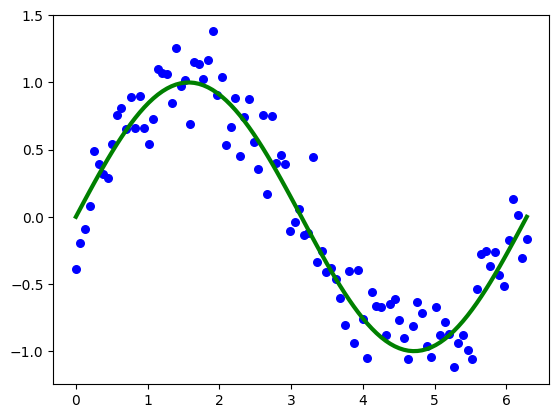

In [2]:
# --- Carrega dados ---
dt = pd.read_excel("Seno.xlsx")
x = dt["x"].values
y = dt["y"].values

# Plota pontos e curva seno real
plt.scatter(x, y, color='blue', label='Dados', s=30)
plt.plot(x, np.sin(x), color='green', linewidth=3, label='sin(x)')

In [3]:
# --- Pré-processamento ---
Y = y.reshape(-1, 1)
X = np.column_stack([np.ones_like(x), x])  # insere bias como primeira coluna
inputs = X.shape[1]
ntrain = X.shape[0]

In [4]:
# --- Hiperparâmetros ---
hidden = 6
learning_rate = 0.01
NSteps = 100000

In [5]:
# --- Inicialização dos pesos ---
np.random.seed(0)
w1 = 0.01 * np.random.randn(inputs, hidden)
w2 = 0.01 * np.random.randn(hidden, 1)
b2 = np.mean(Y)

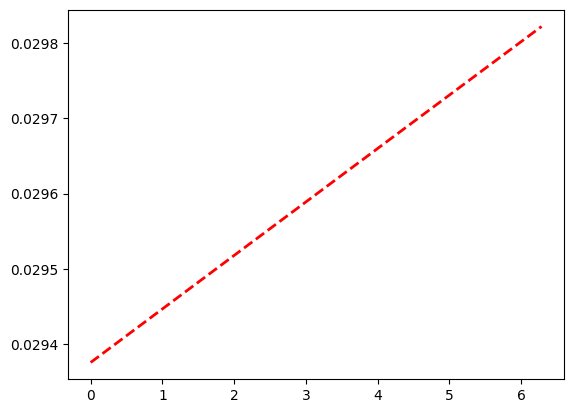

In [6]:
# --- Forward inicial para plotar a curva antes do treino ---
def tanh(z):
    return 2 / (1 + np.exp(-2*z)) - 1

layer1 = X @ w1
Hlayer1 = tanh(layer1)
saida = Hlayer1 @ w2 + b2
plt.plot(x, saida, 'r--', linewidth=2, label='Inicial')

Backpropagation: algoritmo central para treinar redes neurais. Ele calcula como os pesos da rede devem ser ajustados para que a saída da rede se aproxima do valor desejado.

Em termos simples:
1. Forward pass (propagação direta):
* Os dados entram na rede e passam por uma camada
* Cada neurônio aplica a função de ativação e gera uma saída
* No final, obtém-se a saída da rede

2. Cálculo do erro
* Compara a saída prevista com a saída real usando uma função de perda

3. Backward pass (retropropagação)
* O erro é "propagado para trás" na rede, camada por camada
* O gradiente da perda é calculado em relação a cada peso usando a regra da cadeia do cálculo diferencial

4. Atualização dos pesos
* Cada peso $w$ é atualizado na direção que reduz o erro a partir de uma taxa de aprendizado $\eta$
$$w \gets w - \eta\frac{\partial Loss}{\partial w}$$

In [7]:
# --- Loop de treinamento (backpropagation manual) ---
for step in range(1, NSteps+1):
    # Forward Pass
    layer1 = X @ w1
    Hlayer1 = tanh(layer1)
    layer2 = Hlayer1 @ w2 + b2

    # Erro
    erro = Y - layer2

    # Gradientes da camada de saída
    Hlayer1_deriv = 1 - Hlayer1**2
    grad_w2 = -Hlayer1.T @ erro
    grad_b2 = -erro.T @ np.ones((ntrain,1))
    aux_hidden = (erro @ w2.T) * Hlayer1_deriv
    grad_w1 = -X.T @ aux_hidden

    # Atualização dos pesos
    w1 -= learning_rate * (grad_w1 / ntrain)
    w2 -= learning_rate * (grad_w2 / ntrain)
    b2 -= learning_rate * (grad_b2 / ntrain)

    # Monitoramento do erro
    if step % 10000 == 0 or step == 1:
        mse = np.sum((Y - (tanh(X @ w1) @ w2 + b2))**2)
        print(f"{step} - erro: {mse:.6f}")

1 - erro: 50.823024
10000 - erro: 20.310967
20000 - erro: 6.395370
30000 - erro: 5.206641
40000 - erro: 4.678211
50000 - erro: 4.412585
60000 - erro: 4.275206
70000 - erro: 4.198021
80000 - erro: 4.148298
90000 - erro: 4.112416
100000 - erro: 4.084749


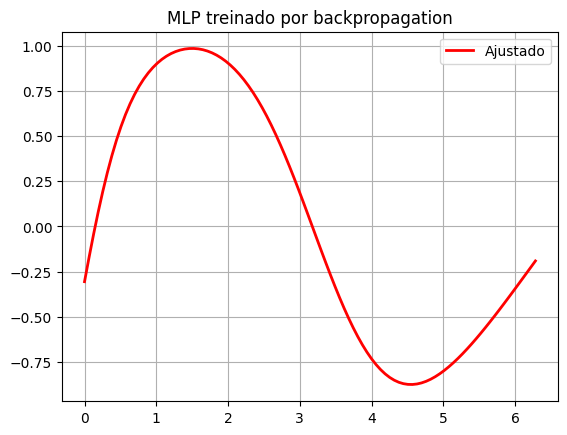

In [8]:
# --- Ajuste final ---
layer1 = X @ w1
Hlayer1 = tanh(layer1)
saida = Hlayer1 @ w2 + b2
plt.plot(x, saida, color='red', linewidth=2, label='Ajustado')

plt.legend()
plt.grid(True)
plt.title("MLP treinado por backpropagation")
plt.show()

Adaptação do código para:
* gráficos mostrando a evolução do erro ao longo das iterações, ou
* com múltiplas camadas escondidas.

1 - erro: 0.508100
5000 - erro: 0.500940
10000 - erro: 0.203187
15000 - erro: 0.137745
20000 - erro: 0.103565
25000 - erro: 0.074166
30000 - erro: 0.067862
35000 - erro: 0.065580
40000 - erro: 0.063535
45000 - erro: 0.060632
50000 - erro: 0.055633


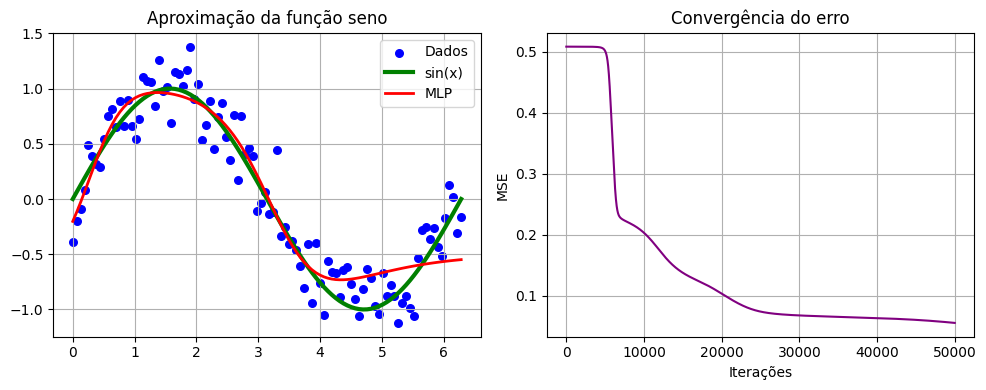

In [9]:
# ------------------------
# Carrega os dados
# ------------------------
dt = pd.read_excel("Seno.xlsx")
x = dt["x"].values
y = dt["y"].values

Y = y.reshape(-1, 1)
X = np.column_stack([np.ones_like(x), x])  # insere bias
n_samples, n_inputs = X.shape

# ------------------------
# Hiperparâmetros
# ------------------------
hidden_layers = [6, 4]   # duas camadas escondidas: 6 neurônios e 4 neurônios
learning_rate = 0.01
n_steps = 50000

# ------------------------
# Inicialização dos pesos
# ------------------------
np.random.seed(0)

# pesos entre camada de entrada e primeira camada escondida
w = [0.01 * np.random.randn(n_inputs, hidden_layers[0])]
# pesos entre camadas escondidas
for i in range(len(hidden_layers)-1):
    w.append(0.01 * np.random.randn(hidden_layers[i], hidden_layers[i+1]))
# pesos entre última escondida e saída
w.append(0.01 * np.random.randn(hidden_layers[-1], 1))

# bias da camada de saída
b_out = np.mean(Y)

# ------------------------
# Funções auxiliares
# ------------------------
def tanh(z):
    return 2 / (1 + np.exp(-2*z)) - 1

def tanh_deriv(a):
    return 1 - a**2

# ------------------------
# Treinamento com backpropagation
# ------------------------
errors = []

for step in range(1, n_steps+1):
    # ---------- FORWARD ----------
    A = [X @ w[0]]                    # entrada na 1ª camada escondida
    H = [tanh(A[0])]                   # saída da 1ª camada escondida
    for i in range(1, len(hidden_layers)):
        A.append(H[i-1] @ w[i])
        H.append(tanh(A[i]))
    out = H[-1] @ w[-1] + b_out

    # ---------- ERRO ----------
    erro = Y - out
    mse = np.mean(erro**2)
    errors.append(mse)

    # ---------- BACKPROP ----------
    # Gradiente da camada de saída
    grad_w_out = -H[-1].T @ erro
    grad_b_out = -np.sum(erro)

    # Gradientes das camadas escondidas (retropropagação)
    delta = (erro @ w[-1].T) * tanh_deriv(H[-1])
    grads = []
    for i in reversed(range(len(hidden_layers)-1)):
        grad = -H[i].T @ delta
        grads.insert(0, grad)
        delta = (delta @ w[i+1].T) * tanh_deriv(H[i])

    # Gradiente da primeira camada escondida
    grad_w0 = -X.T @ delta

    # ---------- ATUALIZAÇÃO DOS PESOS ----------
    w[0] -= learning_rate * grad_w0 / n_samples
    for i, grad in enumerate(grads):
        w[i+1] -= learning_rate * grad / n_samples
    w[-1] -= learning_rate * grad_w_out / n_samples
    b_out -= learning_rate * grad_b_out / n_samples

    if step % 5000 == 0 or step == 1:
        print(f"{step} - erro: {mse:.6f}")

# ------------------------
# Resultados
# ------------------------
# Curva final aprendida
H_final = X @ w[0]
H_final = tanh(H_final)
for i in range(1, len(hidden_layers)):
    H_final = tanh(H_final @ w[i])
saida = H_final @ w[-1] + b_out

# ------------------------
# Plots
# ------------------------
plt.figure(figsize=(10,4))

# Gráfico 1 - Ajuste da rede
plt.subplot(1,2,1)
plt.scatter(x, y, color='blue', label='Dados', s=30)
plt.plot(x, np.sin(x), color='green', linewidth=3, label='sin(x)')
plt.plot(x, saida, color='red', linewidth=2, label='MLP')
plt.title('Aproximação da função seno')
plt.legend()
plt.grid(True)

# Gráfico 2 - Erro durante o treino
plt.subplot(1,2,2)
plt.plot(errors, color='purple')
plt.xlabel('Iterações')
plt.ylabel('MSE')
plt.title('Convergência do erro')
plt.grid(True)

plt.tight_layout()
plt.show()

Aplicação da regularização L2: durante a atualização dos pesos
$$\omega \gets \omega - \eta\left( \frac{\partial \mathcal{L}}{\partial \omega} +\lambda\omega \right)$$
* $\eta$ :: taxa de aprendizado
* $\lambda$ :: fator de regularização (peso da penalização L2)
* $\mathcal{L}$ :: função de perda (erro quadrático médio, no caso)

1 - erro: 0.508100
5000 - erro: 0.500979
10000 - erro: 0.203216
15000 - erro: 0.137795
20000 - erro: 0.103663
25000 - erro: 0.074207
30000 - erro: 0.067877
35000 - erro: 0.065594
40000 - erro: 0.063540
45000 - erro: 0.060609
50000 - erro: 0.055558


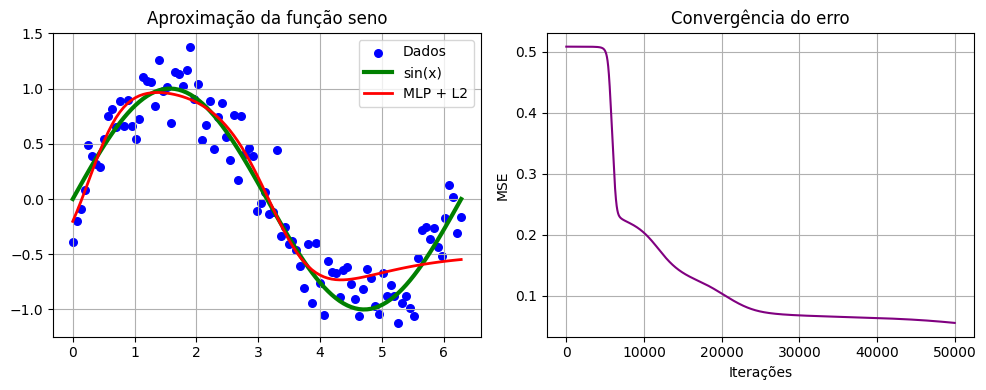

In [10]:
# ------------------------
# Carrega os dados
# ------------------------
dt = pd.read_excel("Seno.xlsx")
x = dt["x"].values
y = dt["y"].values

Y = y.reshape(-1, 1)
X = np.column_stack([np.ones_like(x), x])  # insere bias
n_samples, n_inputs = X.shape

# ------------------------
# Hiperparâmetros
# ------------------------
hidden_layers = [6, 4]       # múltiplas camadas escondidas
learning_rate = 0.01
n_steps = 50000
lambda_l2 = 0.001             # intensidade da regularização L2

# ------------------------
# Inicialização dos pesos
# ------------------------
np.random.seed(0)
w = [0.01 * np.random.randn(n_inputs, hidden_layers[0])]
for i in range(len(hidden_layers)-1):
    w.append(0.01 * np.random.randn(hidden_layers[i], hidden_layers[i+1]))
w.append(0.01 * np.random.randn(hidden_layers[-1], 1))
b_out = np.mean(Y)

# ------------------------
# Funções auxiliares
# ------------------------
def tanh(z):
    return 2 / (1 + np.exp(-2*z)) - 1

def tanh_deriv(a):
    return 1 - a**2

# ------------------------
# Treinamento com backpropagation + L2
# ------------------------
errors = []

for step in range(1, n_steps+1):
    # ---------- FORWARD ----------
    A = [X @ w[0]]
    H = [tanh(A[0])]
    for i in range(1, len(hidden_layers)):
        A.append(H[i-1] @ w[i])
        H.append(tanh(A[i]))
    out = H[-1] @ w[-1] + b_out

    # ---------- ERRO ----------
    erro = Y - out
    mse = np.mean(erro**2)
    errors.append(mse)

    # ---------- BACKPROP ----------
    grad_w_out = -H[-1].T @ erro + lambda_l2 * w[-1]        # L2
    grad_b_out = -np.sum(erro)

    delta = (erro @ w[-1].T) * tanh_deriv(H[-1])
    grads = []
    for i in reversed(range(len(hidden_layers)-1)):
        grad = -H[i].T @ delta + lambda_l2 * w[i+1]          # L2
        grads.insert(0, grad)
        delta = (delta @ w[i+1].T) * tanh_deriv(H[i])

    grad_w0 = -X.T @ delta + lambda_l2 * w[0]                # L2

    # ---------- ATUALIZAÇÃO ----------
    w[0] -= learning_rate * grad_w0 / n_samples
    for i, grad in enumerate(grads):
        w[i+1] -= learning_rate * grad / n_samples
    w[-1] -= learning_rate * grad_w_out / n_samples
    b_out -= learning_rate * grad_b_out / n_samples

    if step % 5000 == 0 or step == 1:
        print(f"{step} - erro: {mse:.6f}")

# ------------------------
# Resultado final
# ------------------------
H_final = X @ w[0]
H_final = tanh(H_final)
for i in range(1, len(hidden_layers)):
    H_final = tanh(H_final @ w[i])
saida = H_final @ w[-1] + b_out

# ------------------------
# Plots
# ------------------------
plt.figure(figsize=(10,4))

# Gráfico 1 - Aproximação final
plt.subplot(1,2,1)
plt.scatter(x, y, color='blue', label='Dados', s=30)
plt.plot(x, np.sin(x), color='green', linewidth=3, label='sin(x)')
plt.plot(x, saida, color='red', linewidth=2, label='MLP + L2')
plt.title('Aproximação da função seno')
plt.legend()
plt.grid(True)

# Gráfico 2 - Erro durante o treino
plt.subplot(1,2,2)
plt.plot(errors, color='purple')
plt.xlabel('Iterações')
plt.ylabel('MSE')
plt.title('Convergência do erro')
plt.grid(True)

plt.tight_layout()
plt.show()